In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 15

## a) 
Implementing method to generate response matrix A.

In [2]:
eps = 0.23


def A(n):
    temp = np.array(n*[1-2*eps])
    temp[0] = 1-eps
    temp[-1] = 1-eps
    
    return np.diag((n-1)*[eps],1) + np.diag(temp) + np.diag((n-1)*[eps],-1)

A(5)

array([[0.77, 0.23, 0.  , 0.  , 0.  ],
       [0.23, 0.54, 0.23, 0.  , 0.  ],
       [0.  , 0.23, 0.54, 0.23, 0.  ],
       [0.  , 0.  , 0.23, 0.54, 0.23],
       [0.  , 0.  , 0.  , 0.23, 0.77]])

Die Matrix A beschreibt die Fluktuationen der Bins einer Messreihe in die anderen Bins. Also eine Art 'Verschmieren' der Bins in die benachbarten Bins.

## b)

In [3]:
f = np.array([193, 485, 664, 763, 804, 805, 779, 736, 684, 626, 566, 508, 452, 400, 351, 308, 268, 233, 202, 173])

g = A(20)@f.T

print('g = ', g)

g =  [260.16 459.01 645.6  749.66 794.8  798.79 775.09 733.93 682.62 625.54
 566.46 508.46 452.92 400.69 352.38 308.69 269.15 233.92 202.46 179.67]


In [4]:
rng = np.random.default_rng(69*69)
g_measured = np.zeros(20)

for i in range(len(g)):
    g_measured[i] = rng.poisson(g[i])

print('g_measured = ', g_measured)

g_measured =  [236. 434. 613. 752. 834. 772. 813. 698. 674. 639. 551. 503. 432. 380.
 338. 311. 244. 240. 209. 176.]


## c)
Die Gleichung $g = Af$ wird zu $c = Db$ mit $b=U^{-1}f$ und $c=U^{-1}g$ und ermöglicht uns, f einfach über Eigenwertmultiplikation zu bestimmen.

In [5]:
A_20 = A(20)
D_values, U = np.linalg.eig(A_20)

#U = np.around(U, 2)
idx = D_values.argsort()[::-1]
D_values = D_values[idx]
U = U[:,idx]

D = np.diag(D_values)

D_inv = np.linalg.inv(D)
U_inv = np.linalg.inv(U)


A_test = np.around(U@D@U_inv,6)
#A_test

## d)


<BarContainer object of 20 artists>

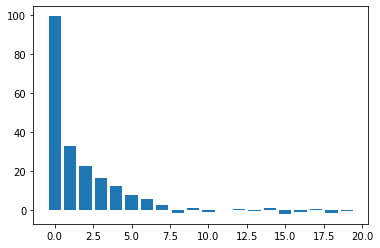

In [6]:
c = U_inv@g_measured
b = D_inv@c
#Varianz von Poissonverteilung ist einfach nur N, also einfach Diagonalmatrix von g_measured
V = np.diag(g_measured)

B = D_inv@U_inv

cov = B@V@B.T

b_norm = np.zeros(20)

for i in range(len(b_norm)):
    b_norm[i] = b[i]/np.sqrt(cov[i][i])
    
i = np.linspace(0,19,20)
fig, ax = plt.subplots()
ax.bar(i,-b_norm) #negativ geplottet, weil schoener

Koeffizienten kleiner als 1 werden als Oszillationen angenommen, die keine Informationen beinhalten. Daher wird der cutoff-Index auf i=7 gesetzt.

## e)

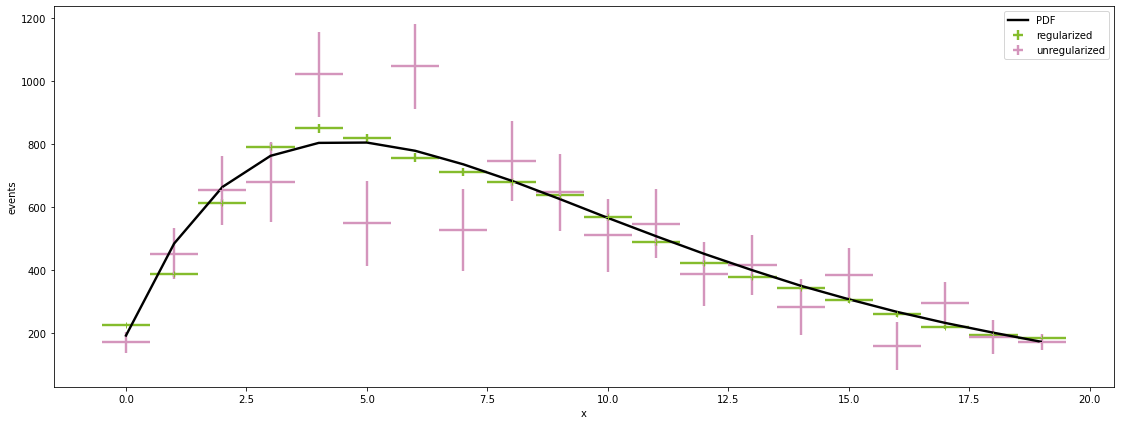

In [52]:
b_cut = np.append(b[0:8], np.zeros(12))

f_unreg = U@b
f_reg = U@b_cut


errors = np.sqrt(np.diag(U@cov@U.T))

fig, ax = plt.subplots(figsize=(19,7))
ax.plot(i,f, label='PDF', c='black', linewidth=2.4)
ax.errorbar(i,f_reg, xerr=0.5, yerr = errors/10, fmt='+', label ='regularized', c='#84bc2c', elinewidth=2.4)
ax.errorbar(i,f_unreg, xerr = 0.5, yerr = errors, fmt='+', label='unregularized', c='#d495bc', elinewidth=2.4)
ax.set_xlabel('x')
ax.set_ylabel('events')
ax.legend()
